In [12]:
#Netflix Movie and TV shows analysis - EDA exploratory data analysis
#Done by: Simone Michael
#Date: 15th Nov 2025
#This notebook explores Netflix's movie and TV shows dataset.
#Here, we analyze the trends top trends, top genres, countries, and ratings to understand Netflix content better.

#Objective  
#To analyze the Netflix dataset containing 8,807 titles (Movies and TV Shows) 
#and extract actionable insights about content type, genre, release trends, country of origin, and audience ratings.  
#This project demonstrates data cleaning, visualization, and analysis skills


#THE SUMMARY:
## Key Steps and Findings:

#1. Data Cleaning
#Removed duplicates and filled missing values.
#Addressed missing data in columns director, cast, country, rating, date_added, and duration.
#Result: no missing values remain.

#2. Movies vs TV Shows
# Movies: 6131 (~70%), TV Shows: 2676 (~30%).
#Insight: Netflix focuses more on Movies, reflecting strategic content distribution.

#3.Top 10 Genres
#Top genres: International Movies (31%), Dramas (28%), Comedies (19%), International TV Shows (15%).
#Insight: Drama and International Movies dominate content, highlighting Netflix’s storytelling and global reach strategy.

#4. Yearly Release Trend
#Sharp increase in titles after 2015, with 2018 having the most releases (1,147 titles).
#Insight: Netflix Originals and content expansion drive recent growth.

#5. Top 10 Countries
#United States leads with 2818 titles (~32%), followed by India (972, ~11%) and UK (419, ~5%).
#Insight: Shows global content strategy, but a notable portion (~9%) has unknown origin.

#6. Ratings Breakdown
#Most content is aimed at mature audiences: TV-MA (36%) and TV-14 (25%).
#Family friendly content accounts for ~16%.
#Insight: Ratings help understand target audiences and guide recommendation systems.

#7. Genre vs Type Analysis
#Movies dominate genres like International Movies, Dramas, Romantic Movies.
#TV Shows dominate International TV Shows and TV Dramas.
#Insight: Genre vs type distribution informs content strategy and audience segmentation.

## Conclusion
#The Netflix dataset provides rich insights about content type, genre, temporal trends, and audience targeting.



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
#here we use pandas for data manipulation and matplotlib and seaborn for data visualization

In [20]:
df = pd.read_csv("netflix_titles.csv")
df.head()

df.info() #shows types of columns and data (incl missing if exists)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [23]:
#DATASET OVERVIEW
#here, this dataset has 8807 enteries and 12 columns in total including show_id, type, date_added, description and more
#most data are objects (strings), only release year is int64 which is helpful for plotting

In [21]:
df.describe(include = "all") #summary of stats
df.isnull().sum() #sum of missing values in every column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#MISSING VALUES:
#director: 2634 missing (30%)
#cast: 825 missing (9%)
#country: 831 missing (9%)
#date_added: 10 missing (0.1%)
#rating: 4 missing (0.05%)
#duration: 3 missing (0.03%)

In [24]:
#DATA CLEANING:

df.drop_duplicates(inplace=True) #here we remove any duplicates 

#filling in any missing values 
df['director'] = df['director'].fillna("No Director")
df['cast'] = df['cast'].fillna("No Cast Listed")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'] = df['date_added'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")

#verify cleaning
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [25]:
#We have now successfully removed any duplicate rows, ensuring each title is unique
#We have filled missing values: such as 
#director, no director 
#cast, cast not listed
#country, country unknown
#rating, replaced with most frequent rating
#date added, unknown
#duration, unknown

#VERIFIED: as we have 0 missing values after cleaning in every column

#CONCLUSION: our dataset is now ready for the eda- exploratory data analysis
#Cleaning the data beforehand ensures us that our analysis will be accurate and free from errors caused by any missing data.

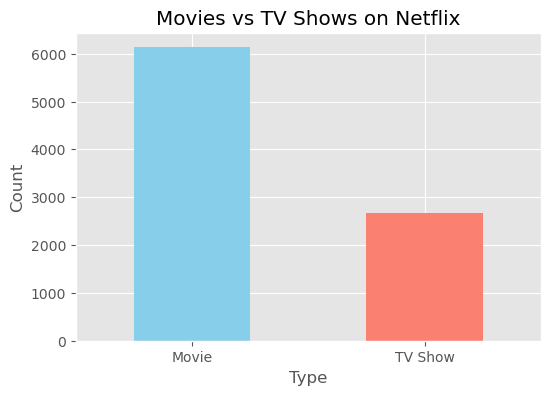

Counts:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Percentages:
 type
Movie      69.62
TV Show    30.38
Name: count, dtype: float64


In [26]:
#MOVIE VS TV SHOWS
#count the number of movies vs tvshows
type_counts = df['type'].value_counts()

#plotting the distribution
type_counts.plot(kind='bar', figsize=(6,4), color=['skyblue','salmon'])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#printing the counts and percentages
print("Counts:\n", type_counts)
print("\nPercentages:\n", round(type_counts / len(df) * 100, 2))

In [ ]:
#OBSERVATION: 
#movies: 6131 (~70%)
#TV Shows: 2676 (~30%)

#this tells us:
#Netflix has more movies than TV Shows, suggesting a focus on film content than telivision series. 
#Understanding this helps with designing content strategy and user engagement analysis.

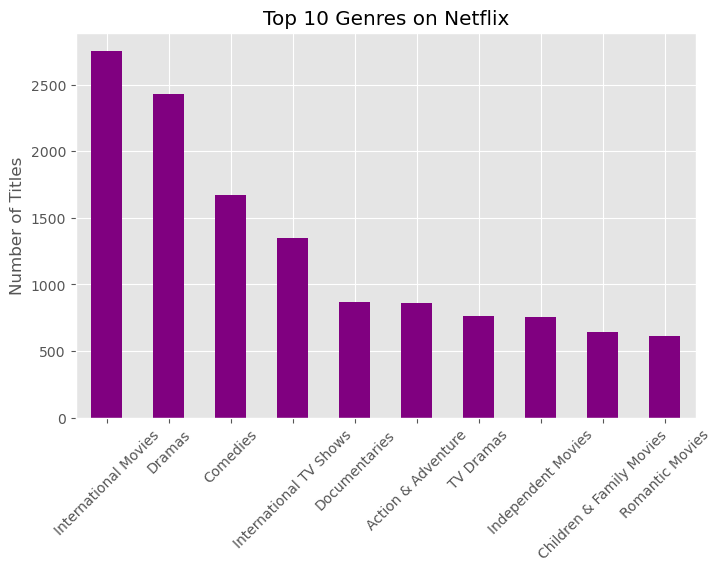

Top 10 Genres Counts:
 International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

Top 10 Genres Percentages:
 International Movies        31.25
Dramas                      27.56
Comedies                    19.01
International TV Shows      15.34
Documentaries                9.87
Action & Adventure           9.75
TV Dramas                    8.66
Independent Movies           8.58
Children & Family Movies     7.28
Romantic Movies              6.99
Name: count, dtype: float64


In [27]:
#TOP 10 GENRES

#splitting the 'listed_in' column by comma to separate multiple genres per title
genres = df['listed_in'].str.split(', ', expand=True).stack()

#counting the top 10 genres
top_genres = genres.value_counts().head(10)

#plotting the top 10 genres
top_genres.plot(kind='bar', figsize=(8,5), color='purple') #specified color of bar and size of fig
plt.title("Top 10 Genres on Netflix") #title name
plt.ylabel("Number of Titles") #label name on y axis
plt.xticks(rotation=45)
plt.show() #displaying plot

#printing the counts and percentages
print("Top 10 Genres Counts:\n", top_genres)
print("\nTop 10 Genres Percentages:\n", round(top_genres / len(df) * 100, 2))


In [ ]:
#the top 10 genres:
#based on our results we know that;
#International movies: 2752 titles accounting ~31%
#Dramas: 2427 titles accounting ~28%
#int tv shows: 1351 titles accounting ~19%
#Documentaries: 869, ~10%
#Action & Adventure: 859, ~10%
#TV Dramas: 763, ~9%
#Independent Movies: 756, ~9%
#Children & Family Movies: 641, ~7%
#Romantic Movies: 616, ~7%

#Insights:
#the data suggests that Netflix has a strong focus on International Movies and dramas, with International TV shows not doing as well as International Movies
#showing a strategy that caters to both a global audience and story driven content
#The genres 'Comedies' and 'Action & Adventure' are also popular, reflecting demand for entertainment and variety.
#Understanding these top genres is important for content recommendation systems and for analyzing viewer preferences.

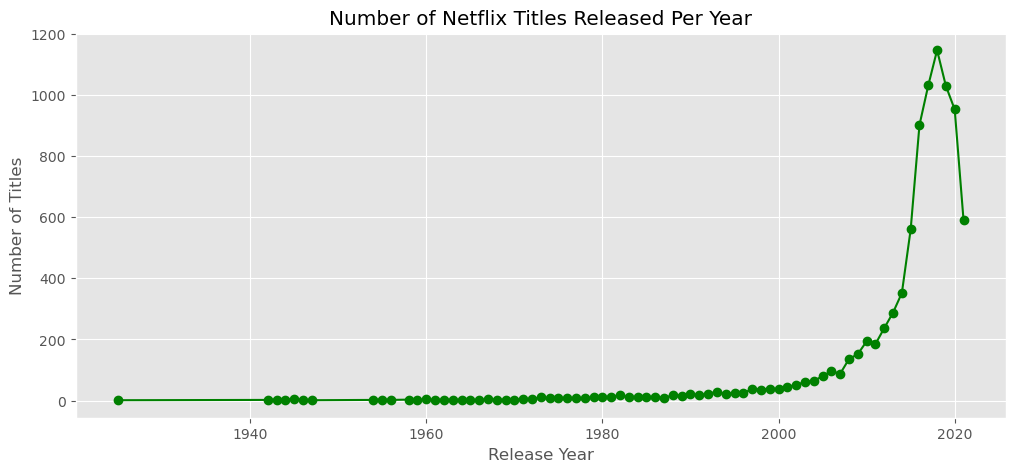

Top 5 Years with Most Titles:
 release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64


In [30]:
#yearly releases

#counting the number of titles released each year
year_counts = df['release_year'].value_counts().sort_index()

#ploting the trend over years
plt.figure(figsize=(12,5))
plt.plot(year_counts.index, year_counts.values, marker='o', color='green')
plt.title("Number of Netflix Titles Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

#printing top years with most releases
print("Top 5 Years with Most Titles:\n", year_counts.sort_values(ascending=False).head())

In [ ]:
#Trends Observed in the yearly release
#We observe that Titles span from early 1900s to 2021 with a Gradual increase in releases from 2000 onwards.
#Sharp increase after 2015, aligning with the launch of Netflix Originals starting 2015.
#Top 5 years with most titles:
# 2018: 1147 titles
#2017: 1032 titles
#2019: 1030 titles
#2020: 953 titles
#2016: 902 titles

#Insights:
#Netflix has significantly increased content production in recent years.
#Understanding release trends highlights growth periods and strategic investments in original content.
#This trend analysis is useful for observing content strategy evolution and planning recommendations.

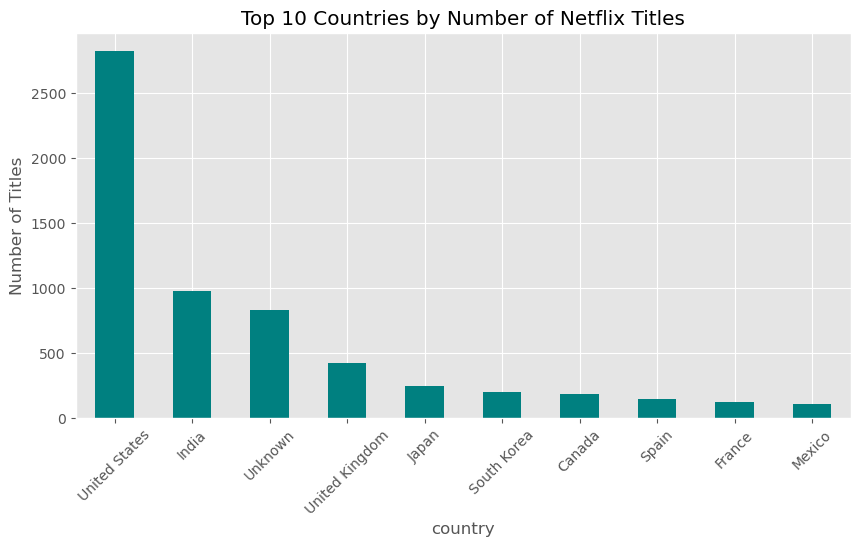

Top 10 Countries Counts:
 country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

Top 10 Countries Percentages:
 country
United States     32.00
India             11.04
Unknown            9.44
United Kingdom     4.76
Japan              2.78
South Korea        2.26
Canada             2.06
Spain              1.65
France             1.41
Mexico             1.25
Name: count, dtype: float64


In [31]:
#TOP 10 COUNTRIES
#count titles per country
country_counts = df['country'].value_counts().head(10)

#plot top 10 countries
country_counts.plot(kind='bar', figsize=(10,5), color='teal') 
plt.title("Top 10 Countries by Number of Netflix Titles") #title of graph 
plt.ylabel("Number of Titles") #yaxis tite
plt.xticks(rotation=45) #x axis rotated 45deg so names are visible 
plt.show() #displying plot

#printing counts and percentages
print("Top 10 Countries Counts:\n", country_counts)
print("\nTop 10 Countries Percentages:\n", round(country_counts / len(df) * 100, 2))


In [ ]:
#We observe that:
#United States: 2818 titles (~32%)
#India: 972 titles (~11%)
#Unknown: 831 titles (~9%)
#United Kingdom: 419 titles (~5%)
#Japan: 245 titles (~3%)
#South Korea: 199 titles (~2%)
#Canada: 181 titles (~2%)
#Spain: 145 titles (~2%)
#France: 124 titles (~1%)
#Mexico: 110 titles (~1%)

#Insights:
#The United States produces the largest share of Netflix content.
#India and the United Kingdom are also significant contributors.
#A notable portion of titles have unknown country information (~9%), which may affect analysis.
#Knowing content origin is useful for understanding global content strategy and audience targeting.

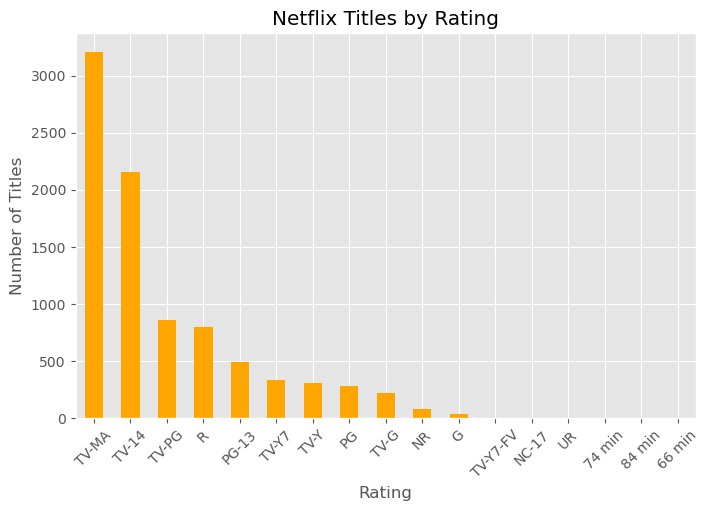

Ratings Counts:
 rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Ratings Percentages:
 rating
TV-MA       36.46
TV-14       24.53
TV-PG        9.80
R            9.07
PG-13        5.56
TV-Y7        3.79
TV-Y         3.49
PG           3.26
TV-G         2.50
NR           0.91
G            0.47
TV-Y7-FV     0.07
NC-17        0.03
UR           0.03
74 min       0.01
84 min       0.01
66 min       0.01
Name: count, dtype: float64


In [32]:
#BREAKDOWN OF RATINGS:

#count of each rating
rating_counts = df['rating'].value_counts()

#plotting the ratings
rating_counts.plot(kind='bar', figsize=(8,5), color='orange') #specifying fig size and color of bars
plt.title("Netflix Titles by Rating") #title of graph
plt.xlabel("Rating") #xaxis label
plt.ylabel("Number of Titles") #yaxis label
plt.xticks(rotation=45) #rotating x axis by 45deg to ensure readability
plt.show() #displaying plot

#printing counts and percentages
print("Ratings Counts:\n", rating_counts)
print("\nRatings Percentages:\n", round(rating_counts / len(df) * 100, 2))


In [ ]:
#OBSERVATION:
#TV-MA: 3211 titles (~36%)
#TV-14: 2160 titles (~25%)
#TV-PG: 863 titles (~10%)
#R: 799 titles (~9%)
#PG-13: 490 titles (~6%)
#TV-Y7: 334 titles (~4%)
#TV-Y: 307 titles (~3%)
#PG: 287 titles (~3%)
#TV-G: 220 titles (~3%)
#NR (Not Rated): 80 titles (~1%)
#G: 41 titles (~0.5%)
#Others / anomalies: TV-Y7-FV, NC-17, UR, and a few durations (74min,84min, 66min) are misclassified as ratings (~0.1% each)

#Insights:
#Netflix has a large proportion of content aimed at mature audiences (TV-MA, TV-14), making up ~61% of the titles.
#Family-friendly content (TV-PG, TV-Y, TV-G) accounts for ~16%.
#A few anomalies exist in the rating column, likely due to misclassified duration values. This highlights the importance of data cleaning.
#Understanding rating distribution is useful for audience segmentation, content strategy, and recommendation systems.

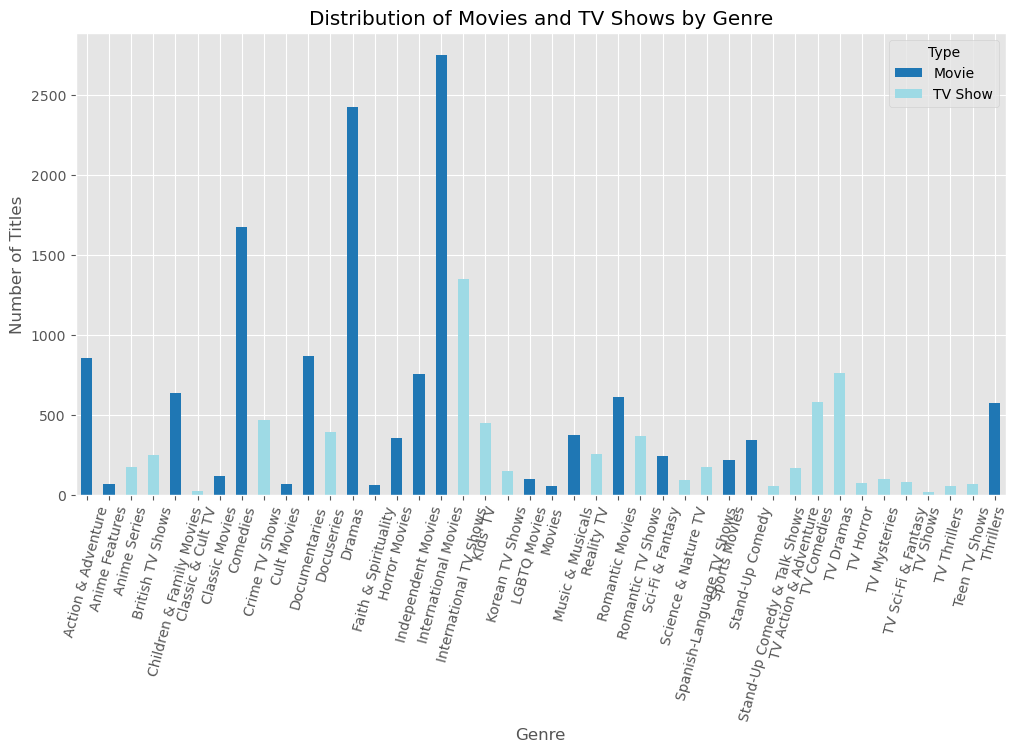

In [35]:
#Genre Vs Type

#creating a new DataFrame to separate genres
df_genres = df[['type', 'listed_in']].copy()
df_genres = df_genres.assign(listed_in=df_genres['listed_in'].str.split(', ')).explode('listed_in')

#count number of Movies vs TV Shows per genre
genre_type_counts = df_genres.groupby(['listed_in', 'type']).size().unstack(fill_value=0)

#plot stacked bar chart
genre_type_counts.plot(kind='bar', figsize=(12,6), stacked=True, colormap='tab20')
plt.title("Distribution of Movies and TV Shows by Genre")
plt.ylabel("Number of Titles")
plt.xlabel("Genre")
plt.xticks(rotation=75) #rotating by 75deg to ensure readability
plt.legend(title="Type")
plt.show()


In [37]:
#OBSERVATION:
#Some genres such as action&adventure, Romance, comedies etc are dominated by movies
#Others have more TV Shows, eg International TV Shows

#INSIGHTS:
#Understanding the breakdown of Movies vs TV Shows per genre helps identify content strategy:
#Netflix produces certain genres mainly as Movies (eg International Movies, Dramas).
#TV Shows focus on genres like International TV Shows and TV Dramas.
#This visualization is helpful for:
#Recommendation systems (genre + type suggestions)
#Strategic content planning
#Portfolio demonstration of multi level EDA and insights